# CS 1656 – Introduction to Data Science

## Instructor: Alexandros Labrinidis 
### Teaching Assistant: Tahereh Arabghalizi
### Additional credits: E. Karageorgos, Zuha Agha, Anatoli Shein, Phuong Pham
## Lab 5: Networks in Python - NLTK and Stemming 
---

The first part of the lab focuses on managing and querying graphs. We will use material from https://networkx.github.io/documentation/stable/tutorial.html 

In [2]:
import networkx as nx

Let's first create a simple unidirectional graph

In [10]:
G = nx.Graph()

Let's add two nodes, labeled 4 and 8

In [11]:
G.add_node(4)
G.add_node(8)

Let's add an edge connecting these two nodes

In [12]:
G.add_edge(4,8)

Let's see what we have done.

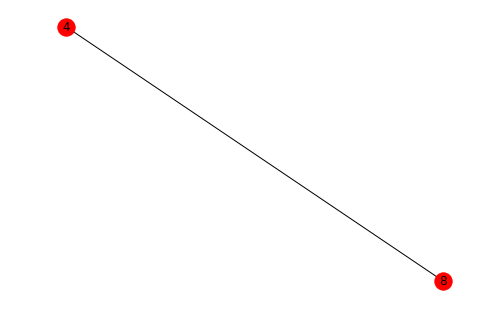

In [13]:
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True)
plt.show()

We can also add nodes and edges in bulk

In [14]:
mynodes = [1,2,3,5,6,7]
myedges = [(1,2),(3,4),(5,6),(7,8)]
G.add_nodes_from(mynodes)
G.add_edges_from(myedges)

Let's see what we have.

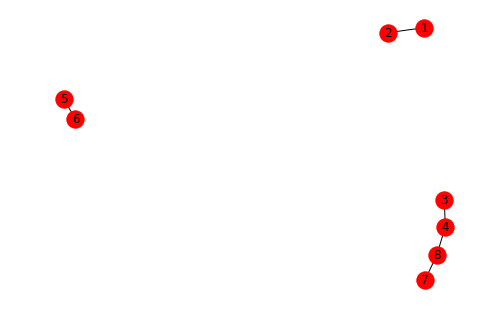

In [15]:
nx.draw(G, with_labels=True)
plt.show()

Some simple statistics on our graph

In [16]:
print ("Number of nodes:",G.number_of_nodes())
print ("Number of edges:",G.number_of_edges())


Number of nodes: 8
Number of edges: 5


Let's see a list of all the nodes and of all the edges.

In [17]:
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: [4, 8, 1, 2, 3, 5, 6, 7]
Edges: [(4, 8), (4, 3), (8, 7), (1, 2), (5, 6)]


We can also get the lists of edges from a specific node or specific nodes.

In [18]:
print("Edges in/out of node 4:", list(G.edges(4)))

Edges in/out of node 4: [(4, 8), (4, 3)]


In [19]:
print("Edges in/out of nodes 4 and 5:", list(G.edges([4,5])))

Edges in/out of nodes 4 and 5: [(4, 8), (4, 3), (5, 6)]


Let's add a few more edges, to make it more interesting.

In [20]:
myedges2 = [(1,3),(1,4),(2,5),(2,6),(2,7),(2,8)]
G.add_edges_from(myedges2)

In [21]:
print("Nodes:", list(G.nodes()))
print("Edges:", list(G.edges()))

Nodes: [4, 8, 1, 2, 3, 5, 6, 7]
Edges: [(4, 8), (4, 3), (4, 1), (8, 7), (8, 2), (1, 2), (1, 3), (2, 5), (2, 6), (2, 7), (5, 6)]


In [22]:
print("Nodes adjacent to node 1:", list(G.adj[1]))

Nodes adjacent to node 1: [2, 3, 4]


In [23]:
print("Nodes neighboring to node 1:", list(G.neighbors(1)))  # Same as .adj[]

Nodes neighboring to node 1: [2, 3, 4]


In [24]:
print("Degree of node 1:", G.degree(1))

Degree of node 1: 3


In [25]:
print("Degree of nodes 1,2:", G.degree([1,2]))

Degree of nodes 1,2: [(1, 3), (2, 5)]


Add an attribute to every node in the graph.

In [26]:
for i in list(G.nodes()):
    print ("Node:",i)
    G.node[i]['color'] = 'Blue'
    print ("Node:",G.node[i])

Node: 4
Node: {'color': 'Blue'}
Node: 8
Node: {'color': 'Blue'}
Node: 1
Node: {'color': 'Blue'}
Node: 2
Node: {'color': 'Blue'}
Node: 3
Node: {'color': 'Blue'}
Node: 5
Node: {'color': 'Blue'}
Node: 6
Node: {'color': 'Blue'}
Node: 7
Node: {'color': 'Blue'}


Let's now create a directed graph.

In [27]:
DG = nx.DiGraph()
newnodes = (1,2,3,4,5,6)
newedges = [(1,2),(2,3),(3,4),(4,3),(4,5),(5,6),(4,6),(3,6),(6,2)]
DG.add_nodes_from(newnodes)
DG.add_edges_from(newedges)
print("Nodes:", list(DG.nodes()))
print("Edges:", list(DG.edges()))

Nodes: [1, 2, 3, 4, 5, 6]
Edges: [(1, 2), (2, 3), (3, 4), (3, 6), (4, 3), (4, 5), (4, 6), (5, 6), (6, 2)]


Let's print the directed graph. Note the thicker parts at the edges, indicating arrows.

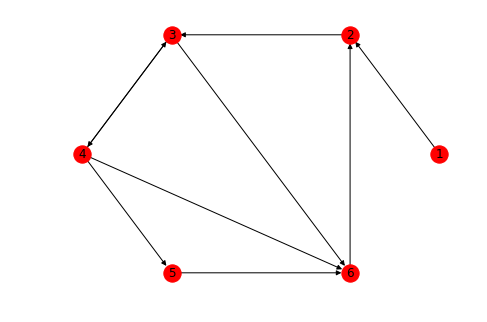

In [28]:
nx.draw_shell(DG, with_labels=True)
plt.show()

Networkx supports many different algorithms, directly on the specified graphs. For more information go to https://networkx.github.io/documentation/stable/reference/algorithms/traversal.html

Let's do a breadth-first traversal of the graph above, starting from node 1.

In [33]:
root = 1
all_edges = nx.bfs_edges(DG,root)  # all edges during breadth-first traversal of graph, starting at root
edgelist = list(all_edges)
print ("Edge List :",edgelist)

Edge List : [(1, 2), (2, 3), (3, 4), (3, 6), (4, 5)]


In [22]:
# easy to understand version
print (root)
for u, v in edgelist:
    print (v)
     
# compact version
nodes = [root] + [v for u, v in edgelist]
print (nodes)

1
2
3
4
6
5
[1, 2, 3, 4, 6, 5]


In [39]:
print (dict(nx.bfs_successors(DG,root)))

{1: [2], 2: [3], 3: [4, 6], 4: [5]}


## NLTK and Stemming:
Stemming usually refers to a crude heuristic process that chops off the ends of words in the hope of achieving this goal correctly most of the time, and often includes the removal of derivational affixes.  

In [42]:
import nltk
mysentence = """During a manned mission to Mars, Astronaut Mark Watney 
            (Matt Damon) is presumed dead after a fierce storm and left behind 
            by his crew.But Watney has survived and finds himself stranded and alone on the hostile planet."""

mysentencetokens = nltk.word_tokenize(mysentence)
#Stemming
porter = nltk.PorterStemmer()
looper = 0
for token in mysentencetokens:
        mysentencetokens[looper] = porter.stem(token)
        looper += 1
print ("Stemmed -->")
print (mysentencetokens)


Stemmed -->
['dure', 'a', 'man', 'mission', 'to', 'mar', ',', 'astronaut', 'mark', 'watney', '(', 'matt', 'damon', ')', 'is', 'presum', 'dead', 'after', 'a', 'fierc', 'storm', 'and', 'left', 'behind', 'by', 'hi', 'crew.but', 'watney', 'ha', 'surviv', 'and', 'find', 'himself', 'strand', 'and', 'alon', 'on', 'the', 'hostil', 'planet', '.']


## Tasks
You should do the following tasks on your own.

**Task 1**
Given the following code that generates three different graphs (graph1, graph2, graph3), compute the degree for each node and report the highest and the lowest degree over all nodes for each of the graphs.

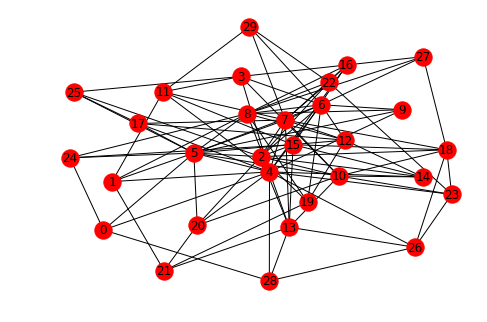

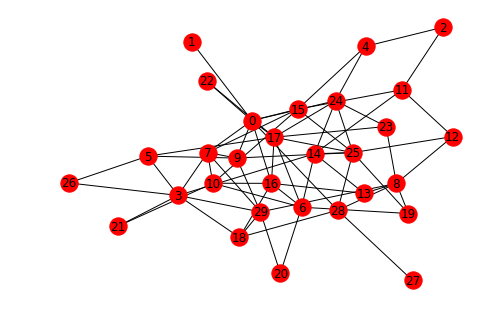

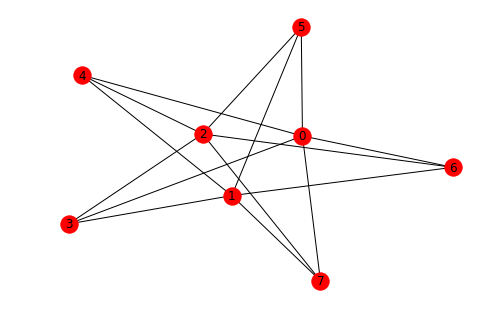

In [34]:
graph1 = nx.barabasi_albert_graph(30, 4)
nx.draw(graph1, with_labels=True)
plt.show()

graph2 = nx.erdos_renyi_graph(30, 0.15)
nx.draw(graph2, with_labels=True)
plt.show()

graph3 = nx.complete_bipartite_graph(3, 5)
nx.draw(graph3, with_labels=True)
plt.show()

**Task 2**
Create a directional graph with 5 nodes and 10 edges. Make sure to include at least one node that has a single outgoing edge and no incoming edges.

**Task 3**
For each node in the graph that you generated in task 2, compute how many nodes are reachable using a BFS traversal starting at that node. Report these for all nodes in the graph. 